### Подключение библиотек, скриптов и файлов

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

### Загрузка данных

Описание датасета


Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь 

KitchenSquare - площадь кухни 

Floor - этаж 

HouseFloor - количество этажей в доме 

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

### Для работы берём обучающую выборку

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)

In [5]:
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [6]:
print('Список данных содержит ', train_df.shape[0], 'строк')

Список данных содержит  10000 строк


Цель - предсказать цену на недвижимость. Дадим ей имя "target"

In [7]:
target = train_df.Price

In [8]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Удалим столбец 'Id' за ненадобностью

In [9]:
train_df = train_df.drop('Id', axis=1)

Изменим тип столбца 'DistrictId' на строку

In [10]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [11]:
train_df.dtypes

DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Разобьём данные на 2 датафрейма. Х - данные о недвижимости, у - цена недвижимости

In [12]:
X = pd.DataFrame(train_df, columns = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 
                                  'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                                  'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'])

In [13]:
X.tail()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A
9997,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B
9999,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: floa

In [15]:
y = pd.DataFrame(target, columns = ['Price'])

In [16]:
y.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [17]:
y.shape

(10000, 1)

In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


#### Рассмотрим категории по отдельности и избавимся от выбросов при их наличии

Rooms

In [19]:
X['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [20]:
X['Rooms_outlier'] = 0
X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1

In [21]:
X.loc[X['Rooms'] == 0, 'Rooms'] = 1
X.loc[X['Rooms'] >= 6, 'Rooms'] = X['Rooms'].median()

In [22]:
X['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

LifeSquare

In [23]:
X['LifeSquare'].value_counts()

35.812832    1
58.218079    1
35.213655    1
23.656629    1
4.289714     1
            ..
82.418226    1
43.005439    1
56.867287    1
87.018830    1
33.743934    1
Name: LifeSquare, Length: 7887, dtype: int64

Жилая площадь 4 кв.м вряд-ли может быть правдой. Примем за минимум нормы Российского законодательства и установим минимум 18 кв.м. 

In [24]:
X['LifeSquare_outlier'] = 0
X.loc[(X['LifeSquare'] <= 18), 'LifeSquare_outlier'] = 1

In [25]:
X.loc[X['LifeSquare'] <= 18, 'LifeSquare'] = 18

In [26]:
X['LifeSquare'].value_counts()

18.000000    425
21.701365      1
35.086787      1
70.238395      1
47.204497      1
            ... 
29.027271      1
27.640733      1
32.356012      1
45.470444      1
36.563743      1
Name: LifeSquare, Length: 7463, dtype: int64

KitchenSquare

In [27]:
X['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
112.0        2
25.0         2
43.0         2
51.0         2
37.0         2
32.0         2
30.0         2
58.0         2
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
62.0         1
42.0         1
63.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
53.0         1
54.0         1
Name: KitchenSquare, dtype: int64

In [28]:
X['KitchenSquare'].quantile(.975), X['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [29]:
condition = (X['KitchenSquare'].isna()) \
             | (X['KitchenSquare'] > X['KitchenSquare'].quantile(.975))
        
X.loc[condition, 'KitchenSquare'] = X['KitchenSquare'].median()

X.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [30]:
X['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

HouseFloor

In [31]:
X['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
48.0        2
99.0        2
39.0        2
117.0       1
29.0        1
31.0        1
38.0        1
44.0        1
36.0        1
26.0        1
45.0        1
47.0        1
Name: HouseFloor, dtype: int64

Дома с этажностью > 40 заменим на 40, а также с этажностью = 0 заменим на медиану (на мой взгляд, это корректнее, чем менять на 1)

In [32]:
X['HouseFloor_outlier'] = 0
X.loc[(X['HouseFloor'] == 0) | (X['HouseFloor'] >= 40), 'HouseFloor_outlier'] = 1

In [33]:
X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = X['HouseFloor'].median()
X.loc[X['HouseFloor'] >= 40, 'HouseFloor'] = 40

In [34]:
X['HouseFloor'].value_counts()

17.0    2331
9.0     1389
12.0    1074
5.0     1031
14.0     625
16.0     576
1.0      497
25.0     374
22.0     343
13.0     296
24.0     176
8.0      141
10.0     135
4.0      134
3.0      127
15.0     123
19.0     108
20.0     105
18.0      89
7.0       59
6.0       58
2.0       48
23.0      40
21.0      33
11.0      28
30.0      21
40.0      15
27.0       6
32.0       4
37.0       4
28.0       3
39.0       2
29.0       1
31.0       1
38.0       1
36.0       1
26.0       1
Name: HouseFloor, dtype: int64

HouseYear

In [35]:
X['HouseYear'].value_counts().tail(30)

1952        10
1953        10
1931         7
1935         7
1950         7
1939         6
1918         5
1933         5
1937         5
1934         4
1938         4
1951         4
1940         4
1930         3
1942         3
1936         3
1919         3
1917         3
1912         2
1929         2
1932         2
1948         2
1941         2
4968         1
1914         1
1947         1
1916         1
1910         1
1928         1
20052011     1
Name: HouseYear, dtype: int64

In [36]:
X['HouseYear_outlier'] = 0
X.loc[(X['HouseYear'] == 0) | (X['HouseYear'] >= 40), 'HouseYear_outlier'] = 1

In [37]:
X.loc[X['HouseYear'] <= 1950, 'HouseYear'] = X['HouseYear'].median()
X.loc[X['HouseYear'] >= 2021, 'HouseYear'] = 2021

In [38]:
X['HouseYear'].value_counts()

1977    2736
2017     308
2016     305
2015     299
2014     210
        ... 
1954      13
1953      10
1952      10
1951       4
2021       2
Name: HouseYear, Length: 71, dtype: int64

Строки DistrictId, Square, Floor, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Helthcare_2, Shops_1 Shops_2 без особенностей

In [39]:
X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1

condition = (X['LifeSquare'].isna()) \
             & (~X['Square'].isna()) \
             & (~X['KitchenSquare'].isna())
        
X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] \
                                            - X.loc[condition, 'KitchenSquare'] - 3

In [40]:
X.drop('Healthcare_1', axis=1, inplace=True)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DistrictId          10000 non-null  object 
 1   Rooms               10000 non-null  float64
 2   Square              10000 non-null  float64
 3   LifeSquare          10000 non-null  float64
 4   KitchenSquare       10000 non-null  float64
 5   Floor               10000 non-null  int64  
 6   HouseFloor          10000 non-null  float64
 7   HouseYear           10000 non-null  int64  
 8   Ecology_1           10000 non-null  float64
 9   Ecology_2           10000 non-null  object 
 10  Ecology_3           10000 non-null  object 
 11  Social_1            10000 non-null  int64  
 12  Social_2            10000 non-null  int64  
 13  Social_3            10000 non-null  int64  
 14  Helthcare_2         10000 non-null  int64  
 15  Shops_1             10000 non-null  int64  
 16  Shops

In [42]:
dummy = {'A': 1, 'B': 0}

X['Ecology_2'] = X['Ecology_2'].replace(dummy)
X['Ecology_3'] = X['Ecology_3'].replace(dummy)
X['Shops_2'] = X['Shops_2'].replace(dummy)

In [43]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Rooms_outlier,LifeSquare_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,...,7976,5,0,11,0,0,0,0,1,0
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,...,10309,1,1,16,0,0,0,0,1,0
2,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,0,...,7759,0,1,3,0,0,0,0,1,0
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,...,5735,3,0,5,0,0,0,0,1,0
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,...,5776,1,2,4,0,0,0,0,1,0


In [44]:
X.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Rooms_outlier',
 'LifeSquare_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'LifeSquare_nan']

#### Разобьём данные на train и test

In [45]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)

In [54]:
check_test = pd.DataFrame({'y_test': y_test ['Price'],
                        'y_pred': y_pred.flatten()},
                       columns = ['y_test', 'y_pred'])

In [55]:
check_test.head(10)

,y_test,y_pred
6252,181530.459031,179285.700967
4684,260456.004692,269255.693617
1731,219945.304640,240955.625058
4742,66883.280318,97588.547775
4521,114086.065201,148067.107827
6340,359065.287230,352988.221341
576,377445.078933,253428.703188
5202,381912.162109,159769.855028
6363,133072.279471,100175.112934
439,184036.005146,175932.815331


Средняя квадратичная ошибка и R2

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
initial_mse = mean_squared_error(y_test, y_pred)

In [62]:
initial_mse

4440980336.76379

In [64]:
r2(y_test, y_pred)

0.48402778235431476

Text(0, 0.5, 'Признак')

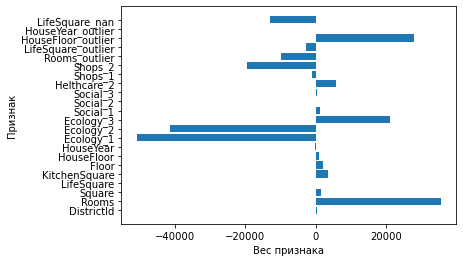

In [65]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

Стандартизация признаков

In [66]:
scaler = StandardScaler()

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [70]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [71]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

Text(0, 0.5, 'Признак')

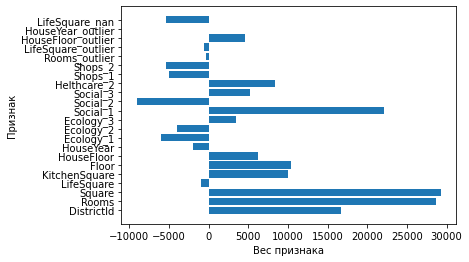

In [72]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

Регуляризация

In [77]:
from sklearn.linear_model import Lasso, Ridge

In [88]:
model = Lasso(alpha=0.03)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2(y_test, y_pred)

0.48711894518818377

In [90]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [93]:
y_pred = lr.predict(X_test_scaled)
check_test = pd.DataFrame({'y_test': y_test ['Price'],
                        'y_pred': y_pred.flatten()},
                       columns = ['y_test', 'y_pred'])

In [94]:
check_test.head(10)

,y_test,y_pred
6252,181530.459031,180353.985034
4684,260456.004692,266364.284946
1731,219945.304640,238687.153462
4742,66883.280318,100770.499946
4521,114086.065201,150514.373608
6340,359065.287230,349367.502295
576,377445.078933,254466.069060
5202,381912.162109,163890.969949
6363,133072.279471,102439.664857
439,184036.005146,178135.466230


<Figure size 432x288 with 0 Axes>

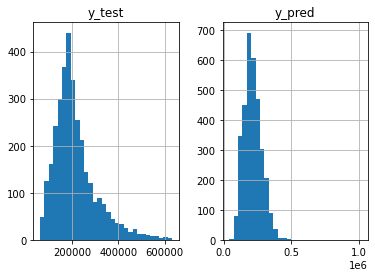

In [105]:
plt.figure()

check_test.hist(bins = 30)

plt.show()

In [96]:
check_test.to_csv('result.csv', index = False)